<a href="https://colab.research.google.com/github/ceska68/Atividades/blob/main/Bastien_Lize_Semana3_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [1]:
# importar pandas
import pandas as pd


In [4]:
# importar base
df = pd.read_csv('ideb.csv')

# selecionar somente as colunas ano, sigla_uf, taxa_aprovacao, nota_saeb_matematica, nota_saeb_lingua_portuguesa e ideb
df = df[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa' , 'ideb']]

# mostrar dados
df.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.60,2.3
1,2005,AC,49.3,151.8,149.60,1.8
2,2005,AC,48.8,163.6,155.80,1.9
3,2005,AC,48.8,159.0,153.39,1.9
4,2005,AC,74.7,138.0,134.19,2.3


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [11]:
# filtrar ano 2019
df_2019 = df.loc[df['ano'] == 2019]

# agrupar por estado usando a média
df_2019 = df_2019.groupby(by='sigla_uf').mean()

# mostrar dados
df_2019.head()

,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,,
AC,2019.0,88.561184,245.253478,237.995942,4.671739
AL,2019.0,92.081591,237.883189,231.412708,4.509295
AM,2019.0,86.853550,223.121965,219.773218,4.032397
AP,2019.0,81.552252,217.216667,215.831111,3.694444
BA,2019.0,83.032948,233.942537,230.205596,4.034125


In [13]:
# transformar o índice (estados) em coluna novamente
df_2019 = df_2019.reset_index()
df_2019.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125


### Atividade 3: Padronize os dados.

In [17]:
# importar a função
from sklearn.preprocessing import StandardScaler

# iniciar a função
scaler = StandardScaler()

# criar uma cópia do DataFrame
df_2019_scaled  = df_2019.copy()

# remover dados categóricos
df_2019_scaled.drop('sigla_uf', inplace=True, axis=1)

# remover ano que é constante
df_2019_scaled.drop('ano', inplace=True, axis=1)

# aplicando a padronização
df_2019_scaled[df_2019_scaled.columns] = scaler.fit_transform(df_2019_scaled)

# acrescentando a coluna estado
df_2019_scaled['sigla_uf'] = df_2019['sigla_uf']

df_2019_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,sigla_uf
0,-0.025280,0.080727,-0.016434,0.092154,AC
1,0.801179,-0.437122,-0.531887,-0.201424,AL
2,-0.426168,-1.474271,-1.443233,-1.063297,AM
3,-1.670713,-1.889188,-1.751891,-1.674063,AP
4,-1.323101,-0.713999,-0.626401,-1.060175,BA


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

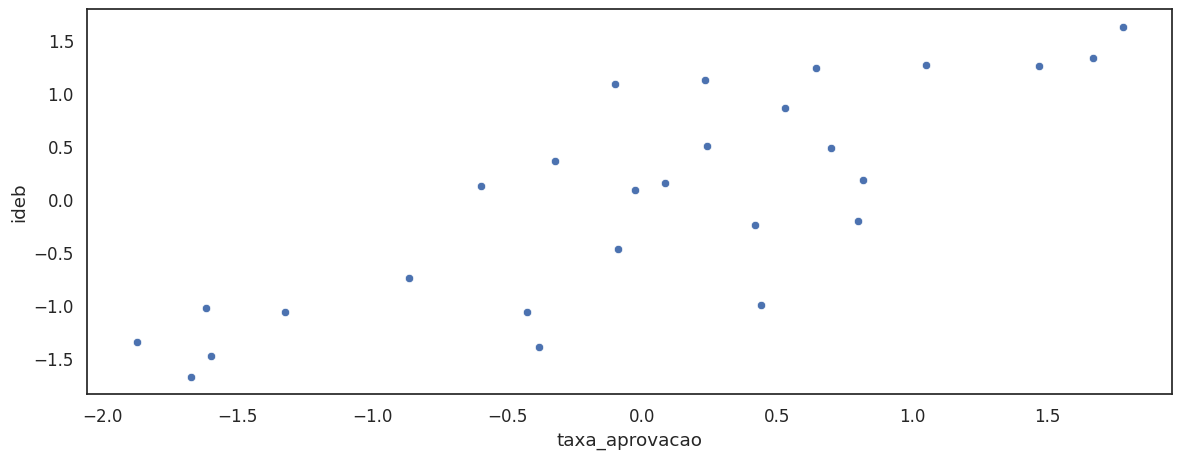

In [18]:
# importar seaborn
import seaborn as sns

# definir estilo dos gráficos
sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})

# criar o gráfico de dispersão
sns.scatterplot(data=df_2019_scaled, x='taxa_aprovacao', y='ideb');


In [19]:
# calcular a correlação entre as variáveis
df_2019_scaled[['taxa_aprovacao','ideb']].corr()

,taxa_aprovacao,ideb
taxa_aprovacao,1.000000,0.810383
ideb,0.810383,1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

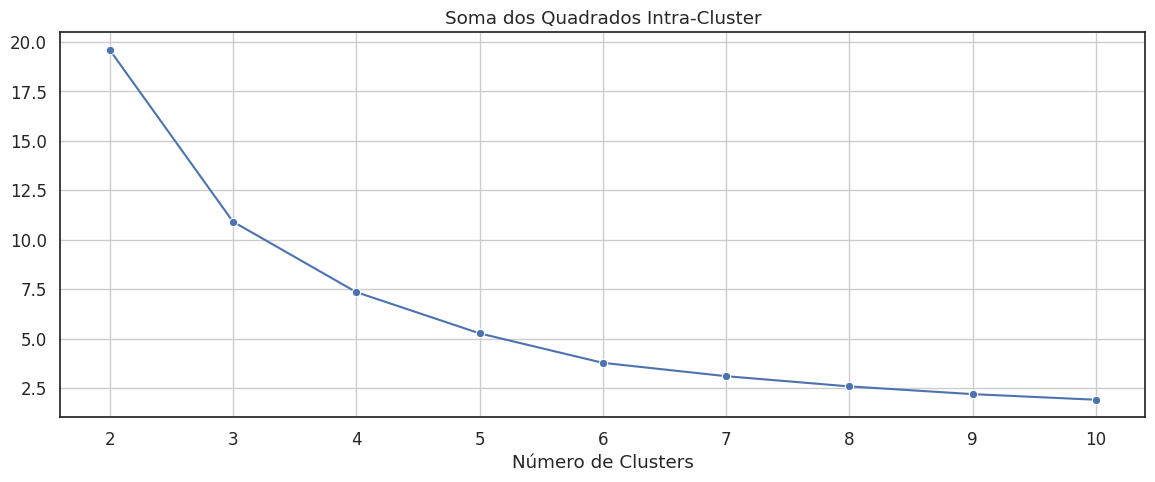

In [26]:
# importar a biblioteca matplotlib
import matplotlib.pyplot as plt

# definir a inercia
inercia = []
k_min = 2
k_max = 10

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=68)
    kmeans.fit(df_2019_scaled[['taxa_aprovacao','ideb']])
    inercia.append(kmeans.inertia_)

# criar o gráfico de cotovelo 
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True)

In [27]:
# definir a métrica

def numero_otimo_clusters(k_min, k_max):
    from sklearn.cluster import KMeans
    import math
    inercia = []

    for i in range(k_min,k_max+1):
        kmeans = KMeans(n_clusters=i, random_state=68)
        kmeans.fit(df_2019_scaled[['taxa_aprovacao','ideb']])
        inercia.append(kmeans.inertia_)
    
    x0, y0 = k_min, inercia[0]
    x1, y1 = k_max, inercia[len(inercia)-1]

    distancias = []
    for i in range(len(inercia)):
        x = i+k_min
        y = inercia[i]
        numerador = abs( (y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0 )
        denominador = math.sqrt( (y1 - y0)**2 + (x1 - x0)**2 )
        distancias.append(numerador/denominador)
    return distancias.index(max(distancias)) + 2

# calcular a quantidade ótima de clusters
k_otimo = numero_otimo_clusters(2,10)

print('Número otimizado de clusters: ' + str(k_otimo))

Número otimizado de clusters: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

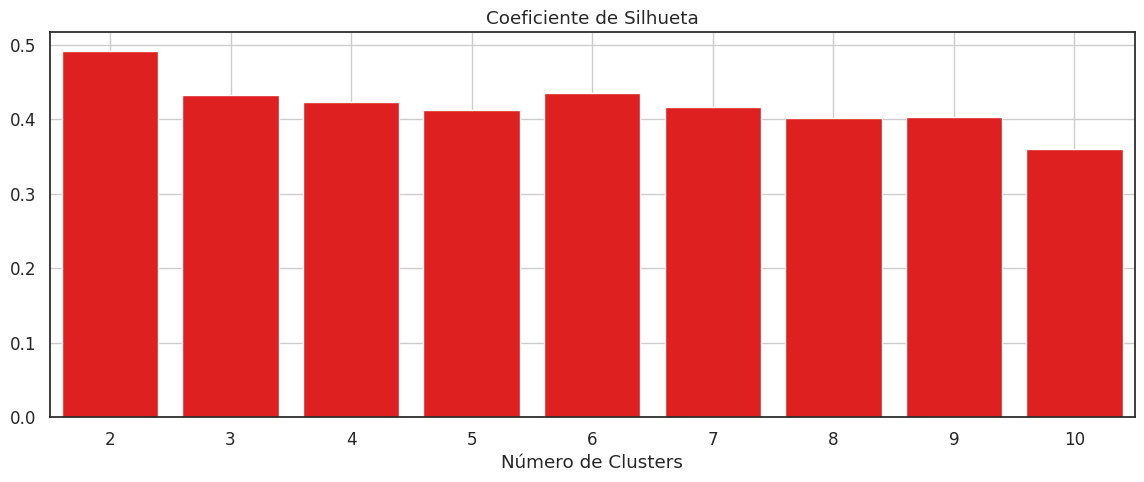

In [28]:
# importar a métrica
from sklearn.metrics import silhouette_score

# definir a métrica
silhueta = []
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=68)
    kmeans.fit(df_2019_scaled[['taxa_aprovacao','ideb']])
    silhueta.append(silhouette_score(df_2019_scaled[['taxa_aprovacao','ideb']],
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.barplot(x=n, y=silhueta, color='red')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

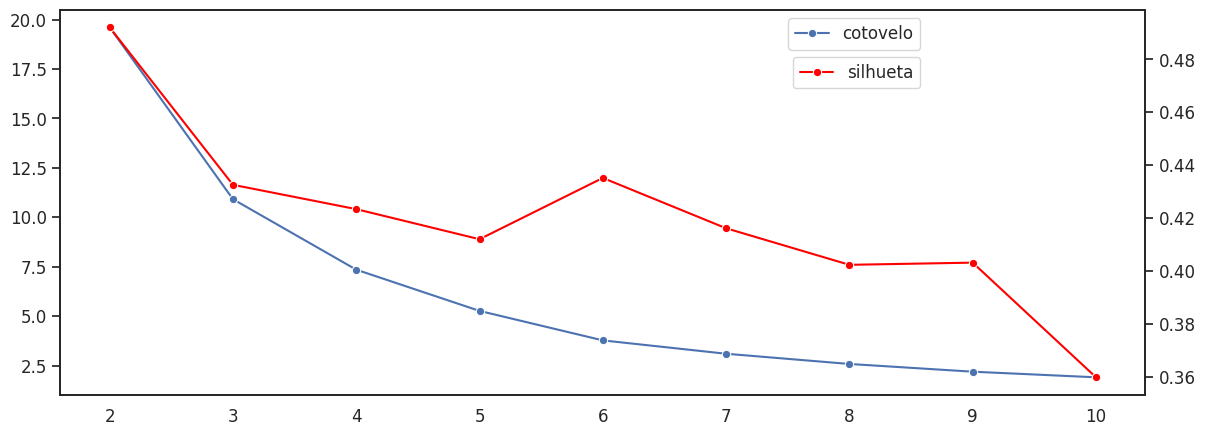

In [29]:
#fazer sobreposição do cotovelo com silhueta
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min,k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [30]:
# importar o KMeans
from sklearn.cluster import KMeans

# instanciar o algoritmo usando o k de 4 definido anteriormente
kmeans = KMeans(n_clusters=4, random_state=68)

# aplicar o algoritmo aos dados 
kmeans.fit(df_2019_scaled[['taxa_aprovacao', 'ideb']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=68)

In [31]:
# ver os grupos
kmeans.labels_

array([1, 1, 0, 3, 3, 2, 1, 2, 2, 0, 1, 1, 1, 3, 0, 1, 0, 2, 1, 3, 1, 0,
       1, 1, 3, 2, 1], dtype=int32)

In [32]:
# adicionar os grupos encontrados ao DataFrame
df_2019['grupos'] = kmeans.labels_.tolist()
df_2019.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739,1
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295,1
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397,0
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444,3
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125,3


### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

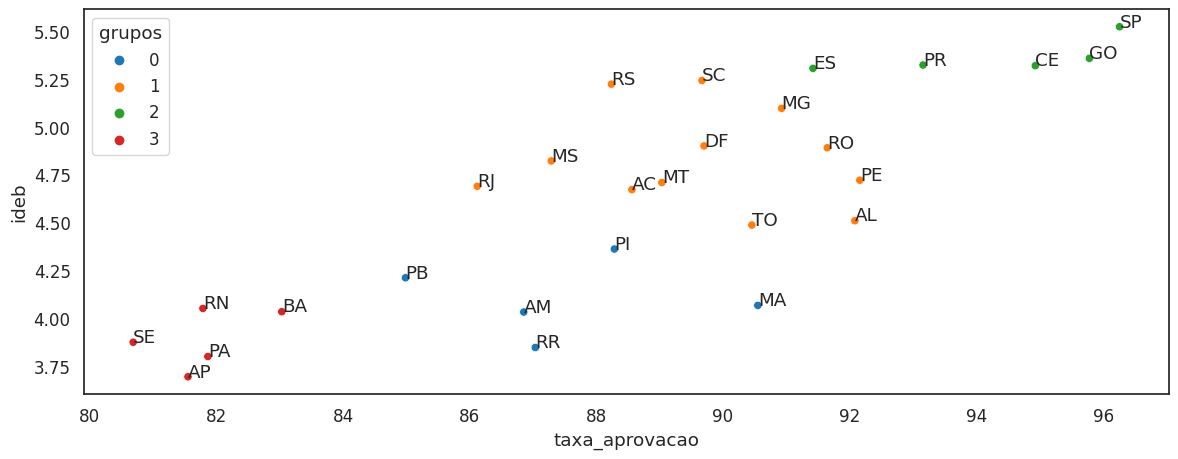

In [50]:
# criar um gráfico de dispersão levando em consideração os grupos
sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb', hue='grupos', palette='tab10');

# criar listas que serviram de apoio para anotar a sigla de cada estado no gráfico
taxa_aprovacao = df_2019['taxa_aprovacao']
ideb = df_2019['ideb']
estados = ['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT',
           'PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estados[i], (taxa_aprovacao[i], ideb[i]) );

### Atividade 8: Quais são os estados de cada grupo?

In [55]:
# listar os grupos
df_agrupado = df_2019.groupby('grupos')['sigla_uf'].apply(list)
print(df_agrupado)

grupos
0                                [AM, MA, PB, PI, RR]
1    [AC, AL, DF, MG, MS, MT, PE, RJ, RO, RS, SC, TO]
2                                [CE, ES, GO, PR, SP]
3                                [AP, BA, PA, RN, SE]
Name: sigla_uf, dtype: object


### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

<Axes: xlabel='grupos', ylabel='ideb'>

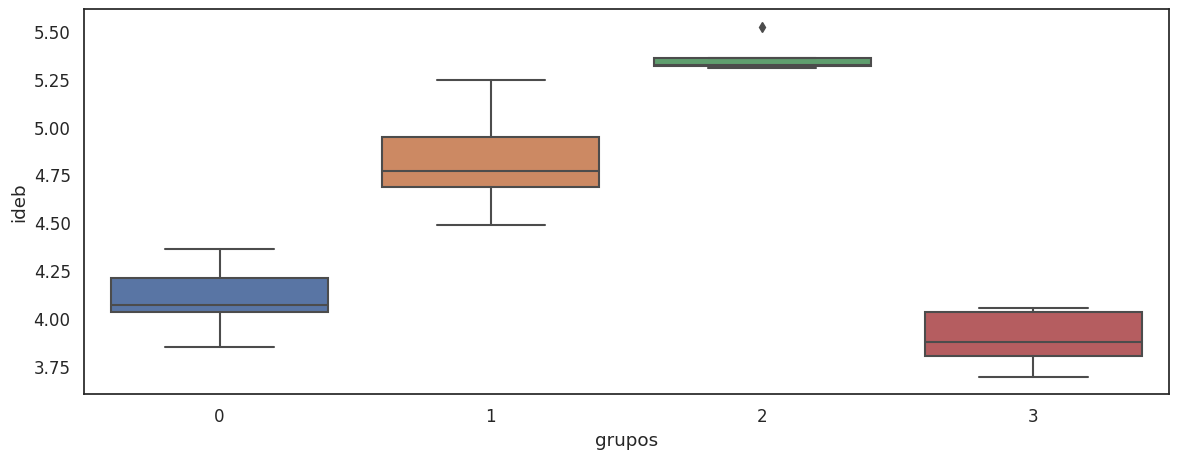

In [52]:
# criar boxplot para ver os valores de ideb por grupo
sns.boxplot(data = df_2019, x = 'grupos', y ='ideb')

<Axes: xlabel='grupos', ylabel='taxa_aprovacao'>

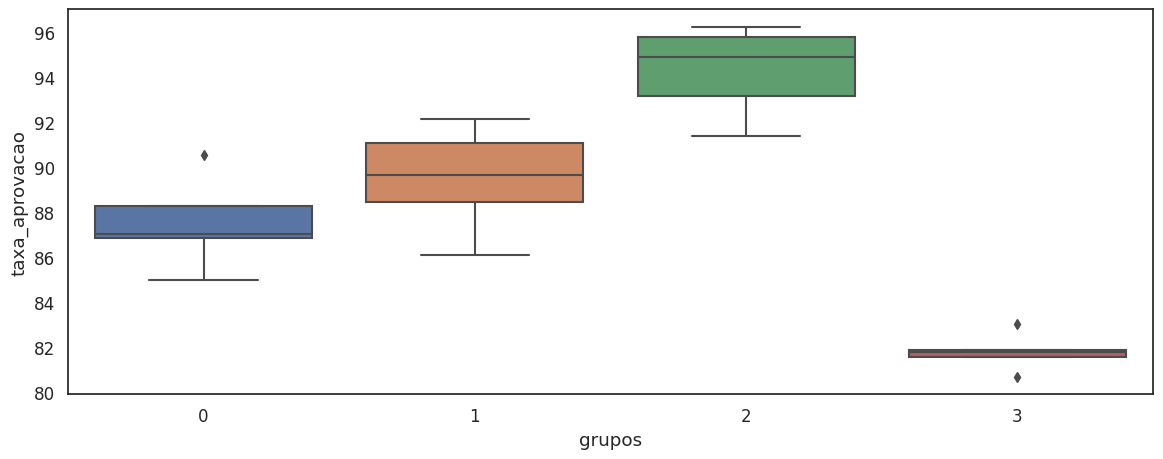

In [53]:
# criar boxplot para ver os valores de taxa_aprovacao por grupo
sns.boxplot(data = df_2019, x = 'grupos', y ='taxa_aprovacao')

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [57]:
# fazer teste post-hoc para ver se os grupos tem ideb diferentes
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_2019['ideb'],
                  groups = df_2019['grupos'],
                  alpha = 0.05)
)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    0.726    0.0  0.4233  1.0287   True
     0      2   1.2613    0.0  0.9016   1.621   True
     0      3   -0.213 0.3778 -0.5727  0.1467  False
     1      2   0.5353 0.0003  0.2326   0.838   True
     1      3   -0.939    0.0 -1.2417 -0.6363   True
     2      3  -1.4743    0.0  -1.834 -1.1146   True
----------------------------------------------------


In [58]:
# fazer teste post-hoc para ver se os grupos tem taxas de aprovação diferentes
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_2019['taxa_aprovacao'],
                  groups = df_2019['grupos'],
                  alpha = 0.05)
)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   2.1146 0.1564  -0.5594  4.7886  False
     0      2   6.7689    0.0   3.5916  9.9461   True
     0      3  -5.7562 0.0002  -8.9335  -2.579   True
     1      2   4.6543 0.0004   1.9802  7.3283   True
     1      3  -7.8708    0.0 -10.5449 -5.1968   True
     2      3 -12.5251    0.0 -15.7023 -9.3479   True
-----------------------------------------------------


Se observamos os boxplots podemos ver que os grupos são bem distintos e dessa forma eles parecem ter sido bem clusterizados.
Com os testes post-hoc temos também a confirmação já que a rejeição é aprovada em todos os casos exceto para o Ideb entre os grupos 0 e 3 e para a taxa de aprovação entre os grupos 0 e 1.

### Atividade 11: Faça a clusterização com outro valor para k.

In [61]:
# importar o KMeans
from sklearn.cluster import KMeans

# instanciar o algoritmo usando o k de 4 definido anteriormente
kmeans_5 = KMeans(n_clusters=5, random_state=68)

# aplicar o algoritmo aos dados 
kmeans_5.fit(df_2019_scaled[['taxa_aprovacao', 'ideb']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=68)

In [62]:
# adicionar os grupos encontrados ao DataFrame
df_2019['grupos_5'] = kmeans_5.labels_.tolist()
df_2019.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos,grupos_5
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739,1,3
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295,1,3
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397,0,1
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444,3,4
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125,3,4


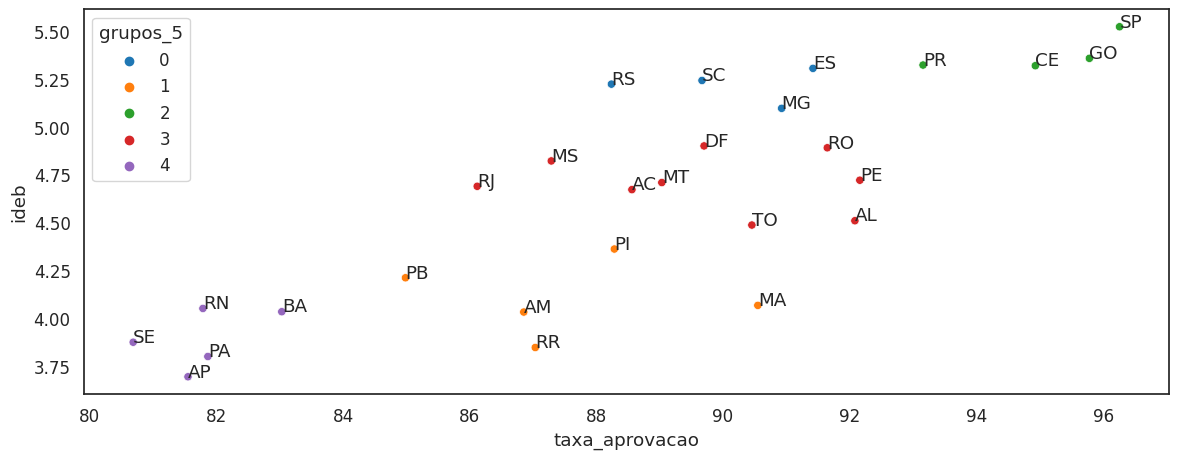

In [66]:
# criar um gráfico de dispersão levando em consideração os grupos
sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb', hue='grupos_5', palette='tab10');

# criar listas que serviram de apoio para anotar a sigla de cada estado no gráfico
taxa_aprovacao = df_2019['taxa_aprovacao']
ideb = df_2019['ideb']
estados = ['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT',
           'PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estados[i], (taxa_aprovacao[i], ideb[i]) );

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

In [67]:
# fazer teste post-hoc para ver se os grupos tem ideb diferentes
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_2019['ideb'],
                  groups = df_2019['grupos_5'],
                  alpha = 0.05)
)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.1125    0.0 -1.4027 -0.8224   True
     0      2   0.1639  0.519  -0.142  0.4697  False
     0      3  -0.5055 0.0001 -0.7654 -0.2456   True
     0      4  -1.3255    0.0 -1.6157 -1.0354   True
     1      2   1.2764    0.0  0.9862  1.5665   True
     1      3    0.607    0.0  0.3658  0.8483   True
     1      4   -0.213 0.1792 -0.4865  0.0606  False
     2      3  -0.6694    0.0 -0.9293 -0.4095   True
     2      4  -1.4894    0.0 -1.7795 -1.1992   True
     3      4    -0.82    0.0 -1.0612 -0.5788   True
----------------------------------------------------


In [68]:
# fazer teste post-hoc para ver se os grupos tem taxas de aprovação diferentes
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_2019['taxa_aprovacao'],
                  groups = df_2019['grupos_5'],
                  alpha = 0.05)
)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   -2.521  0.239   -6.015   0.973  False
     0      2   4.9706 0.0049   1.2876  8.6535   True
     0      3   -0.391 0.9957   -3.521  2.7389  False
     0      4  -8.2772    0.0 -11.7712 -4.7832   True
     1      2   7.4915    0.0   3.9975 10.9855   True
     1      3   2.1299 0.2257  -0.7753  5.0351  False
     1      4  -5.7562 0.0003  -9.0504 -2.4621   True
     2      3  -5.3616 0.0004  -8.4915 -2.2317   True
     2      4 -13.2478    0.0 -16.7418 -9.7538   True
     3      4  -7.8862    0.0 -10.7914  -4.981   True
-----------------------------------------------------


Com os testes post-hoc podemos ver que com 5 grupos a rejeição é reprovada em mais casos que com 4 grupos mas parece também fazer sentido.

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

Pelas minhas buscas sobre redução de dimensionalidade entendi que o objetivo é simplificar a representação dos dados, preservando ao mesmo tempo as informações relevantes. 
Quando os dados possuem muitas dimensões é difícil representá-los graficamente de forma adequada. Reduzir a dimensionalidade permite mapear os dados em um espaço de menor dimensão, facilitando a visualização.
Outro ponto é que não todas as características de um conjunto de dados contribuem igualmente para o seu poder preditivo. A redução de dimensionalidade pode ajudar a identificar e remover características irrelevantes, simplificando os modelos e melhorando o desempenho.